In [1]:
{ "author": "arioboo",
"date": "05-11-2020"}

{'author': 'arioboo', 'date': '05-11-2020'}

In [136]:
from covid19_study.paths import *
import numpy as np
import scipy as sp
import pandas as pd
import os
import glob
import re

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from IPython.display import display,HTML

In [142]:
print("available styles in matplotlib:",plt.style.available)
plt.style.use("seaborn-darkgrid")
plt.rcParams["text.usetex"] = False

available styles in matplotlib: ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# COVID-19 study:

This is my personal programming exercise to give my grain of sand on this pandemy.





### About-me:
Applicant to Data Scientist/Machine Learning jobs, Astrophysicist. Keep the good work up ^^.


In [143]:
## TOP-LEVEL FUNCTIONS
def select_csv(folder, subfolder):
    glob_pattern = "*.csv"
    pattern_path = os.path.join(folder, subfolder, glob_pattern)
    lista_csv = glob.glob(pattern_path)
    return lista_csv

def dict_from_csv(file_list, abs_paths_list):
    csv_dict = _pathing_dict.fromkeys(file_list)
    for i,k in enumerate(file_list):
        csv_dict[k] = abs_paths_list[i] 
    return csv_dict

In [144]:
## RUN:
if __name__ == "__main__":   
    _pathing_dict = {
        "folder": paths["csseC19dataDir"],
        "subfolder":"csse_covid_19_time_series",
    }
    l_tsConf_abs = select_csv(**_pathing_dict)
    l_tsConf = [os.path.basename(l) for l in l_tsConf_abs]
    
    _csv_dict = {
        "file_list":l_tsConf,
        "abs_paths_list":l_tsConf_abs,
    }
    dictCSV = dict_from_csv(**_csv_dict)

    
    

In [145]:
## DF ANALYSIS:
def instantiate_DF(df_entry):
    return pd.read_csv(df_entry)

confirmed = instantiate_DF(dictCSV["time_series_covid19_confirmed_global.csv"])
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813


In [146]:
metadata_columns = ["Province/State","Lat","Long"]
dates_pattern = confirmed.drop(metadata_columns, axis=1).groupby("Country/Region").sum()

df = pd.DataFrame(dates_pattern.T, )
df.index = pd.Index([pd.Timestamp(d) for d in df.index])
display(df)

diff = df.shift(-2) - df 
display(diff)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,41425,20875,57942,4756,10805,128,1166924,89813,27595,104925,...,1014793,3124,66932,92013,1180,53520,10,2063,16432,8367
2020-11-01,41501,21202,58272,4825,11035,128,1173533,92254,27601,109881,...,1038054,3149,67156,92325,1180,54060,10,2063,16480,8374
2020-11-02,41633,21523,58574,4888,11228,128,1183131,93448,27610,114016,...,1057021,3165,67254,92705,1192,54775,10,2063,16543,8389
2020-11-03,41728,21904,58979,4910,11577,128,1195276,94776,27622,118198,...,1077099,3196,67553,93100,1202,55408,10,2063,16661,8410


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,208.0,648.0,632.0,132.0,423.0,0.0,16207.0,3635.0,15.0,9091.0,...,42228.0,41.0,322.0,692.0,12.0,1255.0,0.0,0.0,111.0,22.0
2020-11-01,227.0,702.0,707.0,85.0,542.0,0.0,21743.0,2522.0,21.0,8317.0,...,39045.0,47.0,397.0,775.0,22.0,1348.0,0.0,0.0,181.0,36.0
2020-11-02,181.0,777.0,953.0,157.0,585.0,2.0,22797.0,3702.0,20.0,11083.0,...,45284.0,80.0,525.0,775.0,11.0,1315.0,0.0,0.0,155.0,38.0
2020-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

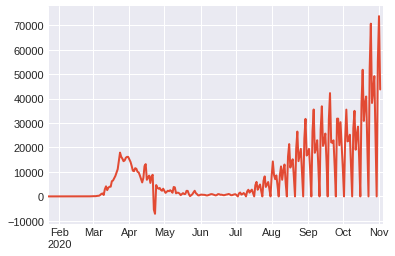

In [147]:

diff["Spain"].asfreq("1d").plot()